In [1]:
# my imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler

Logistic Regression Classification

Loss function is cross-entropy

MNIST dataset

In [2]:
load_digits(as_frame=True).frame

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [3]:
mnist_data = load_digits(as_frame=True)['frame']

In [4]:
mnist_data.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


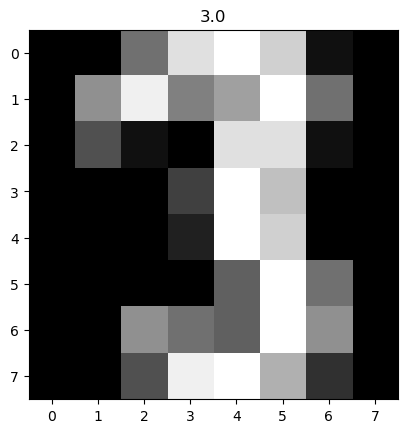

In [5]:
plt.imshow((mnist_data.loc[1170].values[:-1]).reshape(8, 8), cmap='gray')
plt.title(mnist_data.loc[1170].target)
plt.show()

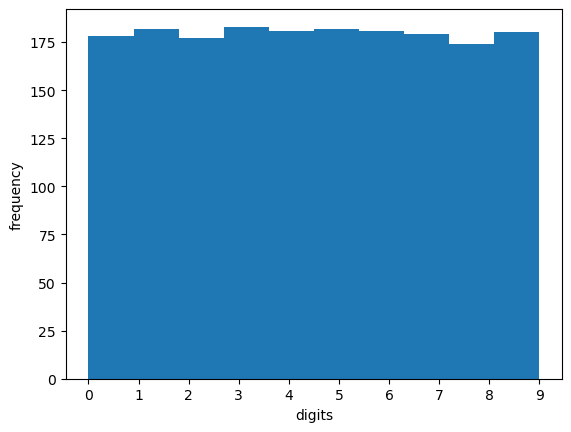

In [6]:
plt.hist(mnist_data.target, bins=10)
plt.xlabel('digits')
plt.xticks(range(10))
plt.ylabel('frequency')
plt.show()

Create Logistic Regression classifier

In [7]:
digits_classifier = LogisticRegression(C=1e12)

Separate features and target for model training

In [8]:
digits_features = mnist_data.drop(columns=['target'])
digits_target = mnist_data.target

In [9]:
digits_classifier.fit(digits_features, digits_target)

LogisticRegression(C=1000000000000.0)

In [10]:
digits_classifier.coef_.shape

(10, 64)

10 models with 64 features (1 model per digit, 1 feature per pixel)

In [11]:
scaler = MinMaxScaler()

In [12]:
digits_features_scaled = scaler.fit_transform(digits_features)

In [13]:
mnist_model_scaled = LogisticRegression(C = 1e12)

In [14]:
mnist_model_scaled.fit(digits_features_scaled, digits_target)

LogisticRegression(C=1000000000000.0)

In [15]:
digits_classifier.score(digits_features, digits_target)

1.0

In [16]:
mnist_model_scaled.score(digits_features_scaled, digits_target)

1.0